In [2]:
def read_nlls(fn):
    nlls = []
    with open(fn) as lines:
        flag = False
        for line in lines:
            if line.startswith('####'):
                flag = True
                continue
            if not flag or not line.startswith('epoch'):
                continue
            nlls.append(float(line[line.index('nll:  ') + 6: ]))
    return nlls

def process(nlls, step):
    res = []
    total_len = len(nlls)
    count = total_len // step
    for i in range(count):
        res.append(sum(nlls[i * step:(i + 1) * step]) / step)
    return res

In [3]:
vae_8_fn = 'save/basic_vae_1608195428.log'
vae_20_fn = 'save/basic_vae_1608371452.log'
vae_64_fn = 'save/basic_vae_1608515623.log'
seqgan_8_fn = 'save/seq_gan_1608184269.log'
seqgan_20_fn = 'save/seq_gan_1608280365.log'
seqgan_64_fn = 'save/seq_gan_1608385324.log'
seqvae_1_8_fn = 'save/seq_vae_1_1609122881.log'
seqvae_1_20_fn = 'save/seq_vae_1_1609073755.log'
seqvae_1_64_fn = 'save/seq_vae_1_1609050572.log'
seqvae_2_8_fn = 'save/seq_vae_2_1609036083.log'
seqvae_2_20_fn = 'save/seq_vae_2_1608973093.log'
seqvae_2_64_fn = 'save/seq_vae_2_1608991914.log'

vae_8 = read_nlls(vae_8_fn)
vae_20 = read_nlls(vae_20_fn)
vae_64 = read_nlls(vae_64_fn)
seqgan_8 = read_nlls(seqgan_8_fn)
seqgan_20 = read_nlls(seqgan_20_fn)
seqgan_64 = read_nlls(seqgan_64_fn)
seqvae_1_8 = read_nlls(seqvae_1_8_fn)
seqvae_1_20 = read_nlls(seqvae_1_20_fn)
seqvae_1_64 = read_nlls(seqvae_1_64_fn)
seqvae_2_8 = read_nlls(seqvae_2_8_fn)
seqvae_2_20 = read_nlls(seqvae_2_20_fn)
seqvae_2_64 = read_nlls(seqvae_2_64_fn)

vae_8 = process(vae_8[:60], 5)
seqgan_8 = process(seqgan_8[:-1], 5)
seqvae_1_8 = process(process(seqvae_1_8, 5), 5)
seqvae_2_8 = process(process(seqvae_2_8, 5), 5)

vae_20 = vae_20[:40]
seqgan_20 = process(seqgan_20[:200], 5)
seqvae_1_20 = process(seqvae_1_20, 5)
seqvae_2_20 = process(seqvae_2_20, 5)

seqgan_64 = process(seqgan_64[:40], 4)
seqvae_1_64 = process(seqvae_1_64[:40], 4)
seqvae_2_64 = process(seqvae_2_64[:40], 4)

print(len(vae_8))
print(len(seqgan_8))
print(len(seqvae_1_8))
print(len(seqvae_2_8))

print(len(vae_20))
print(len(seqgan_20))
print(len(seqvae_1_20))
print(len(seqvae_2_20))

print(len(seqgan_64))
print(len(seqvae_1_64))
print(len(seqvae_2_64))

print(min(vae_8))
print(min(seqgan_8))
print(min(seqvae_1_8))
print(min(seqvae_2_8))

print(min(vae_20))
print(min(seqgan_20))
print(min(seqvae_1_20))
print(min(seqvae_2_20))

print(min(seqgan_64))
print(min(seqvae_1_64))
print(min(seqvae_2_64))

12
12
12
12
40
40
40
40
10
10
10
8.535689600000001
7.53606918
8.18508466
7.459990916
8.793368
8.4920644
8.533577800000002
8.415065
8.32142525
8.180994250000001
8.186851500000001


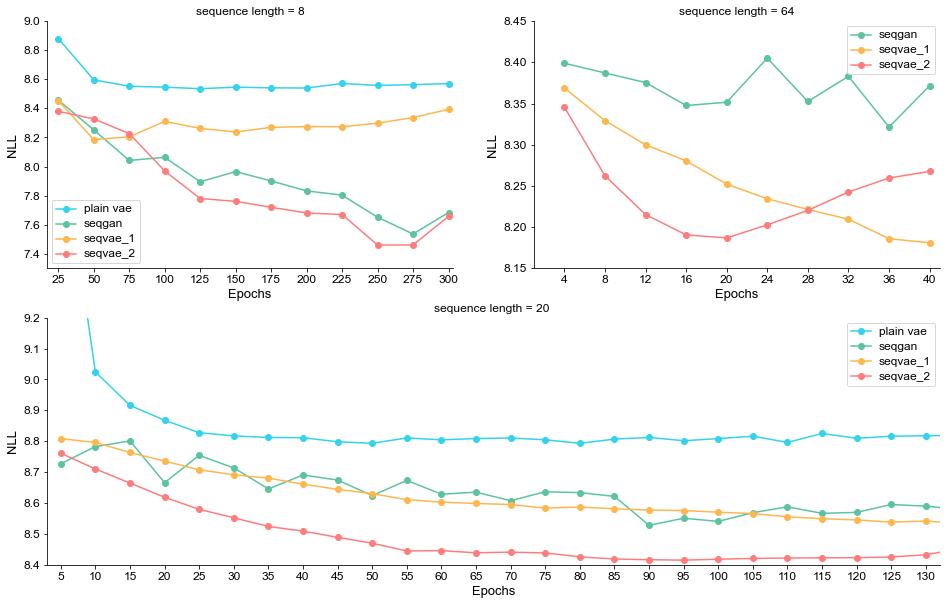

In [4]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['Arial']  # 如果要显示中文字体,则在此处设为：SimHei
plt.rcParams['axes.unicode_minus'] = False  # 显示负号

plt.figure(figsize=(16, 10))

# for 8
plt.subplot(221)
x = np.array([(i+1) * 5 * 5 for i in range(len(vae_8))])

pn_base_vae_nlls = np.array(vae_8)
pn_seq_gan_nlls = np.array(seqgan_8)
pn_seq_vae_1_nlls = np.array(seqvae_1_8)
pn_seq_vae_2_nlls = np.array(seqvae_2_8)

# plt.grid(linestyle="--")  # 设置背景网格线为虚线
ax = plt.gca()
ax.spines['top'].set_visible(False)  # 去掉上边框
ax.spines['right'].set_visible(False)  # 去掉右边框
plt.plot(x, pn_base_vae_nlls, marker='o', color="#32d3eb", label="plain vae", linewidth=1.5)
plt.plot(x, pn_seq_gan_nlls, marker='o', color="#5bc49f", label="seqgan", linewidth=1.5)
plt.plot(x, pn_seq_vae_1_nlls, marker='o', color="#feb64d", label="seqvae_1", linewidth=1.5)
plt.plot(x, pn_seq_vae_2_nlls, marker='o', color="#ff7c7c", label="seqvae_2", linewidth=1.5)

group_labels = [str(it) for it in x]  # x轴刻度的标识
plt.xticks(x, group_labels, fontsize=12)  # 默认字体大小为10
plt.yticks(fontsize=12)
plt.title("sequence length = 8", fontsize=12)  # 默认字体大小为12
plt.xlabel("Epochs", fontsize=13)
plt.ylabel("NLL", fontsize=13)

plt.xlim(17, 303)  # 设置x轴的范围
plt.ylim(7.3, 9.0)
plt.legend(loc=0, numpoints=1)
leg = plt.gca().get_legend()
ltext = leg.get_texts()
plt.setp(ltext, fontsize=12)  # 设置图例字体的大小和粗细

# for 64
plt.subplot(222)
x = np.array([(i+1) * 4 for i in range(len(seqgan_64))])
pn_seq_gan_nlls = np.array(seqgan_64)
pn_seq_vae_1_nlls = np.array(seqvae_1_64)
pn_seq_vae_2_nlls = np.array(seqvae_2_64)

# plt.grid(linestyle="--")  # 设置背景网格线为虚线
ax = plt.gca()
ax.spines['top'].set_visible(False)  # 去掉上边框
ax.spines['right'].set_visible(False)  # 去掉右边框

plt.plot(x, pn_seq_gan_nlls, marker='o', color="#5bc49f", label="seqgan", linewidth=1.5)
plt.plot(x, pn_seq_vae_1_nlls, marker='o', color="#feb64d", label="seqvae_1", linewidth=1.5)
plt.plot(x, pn_seq_vae_2_nlls, marker='o', color="#ff7c7c", label="seqvae_2", linewidth=1.5)

group_labels = [str(it) for it in x]  # x轴刻度的标识
plt.xticks(x, group_labels, fontsize=12)  # 默认字体大小为10
plt.yticks(fontsize=12)
plt.title("sequence length = 64", fontsize=12)  # 默认字体大小为12
plt.xlabel("Epochs", fontsize=13)
plt.ylabel("NLL", fontsize=13)

plt.xlim(1, 41)  # 设置x轴的范围
plt.ylim(8.15, 8.45)
plt.legend(loc=0, numpoints=1)
leg = plt.gca().get_legend()
ltext = leg.get_texts()
plt.setp(ltext, fontsize=12)  # 设置图例字体的大小和粗细

# for 20
plt.subplot(212)
x = np.array([(i+1) * 5 for i in range(len(vae_20))])
pn_base_vae_nlls = np.array(vae_20)
pn_seq_gan_nlls = np.array(seqgan_20)
pn_seq_vae_1_nlls = np.array(seqvae_1_20)
pn_seq_vae_2_nlls = np.array(seqvae_2_20)

# plt.grid(linestyle="--")  # 设置背景网格线为虚线
ax = plt.gca()
ax.spines['top'].set_visible(False)  # 去掉上边框
ax.spines['right'].set_visible(False)  # 去掉右边框

plt.plot(x, pn_base_vae_nlls, marker='o', color="#32d3eb", label="plain vae", linewidth=1.5)
plt.plot(x, pn_seq_gan_nlls, marker='o', color="#5bc49f", label="seqgan", linewidth=1.5)
plt.plot(x, pn_seq_vae_1_nlls, marker='o', color="#feb64d", label="seqvae_1", linewidth=1.5)
plt.plot(x, pn_seq_vae_2_nlls, marker='o', color="#ff7c7c", label="seqvae_2", linewidth=1.5)

group_labels = [str(it) for it in x]  # x轴刻度的标识
plt.xticks(x, group_labels, fontsize=12)  # 默认字体大小为10
plt.yticks(fontsize=12)
plt.title("sequence length = 20 ", fontsize=12)  # 默认字体大小为12
plt.xlabel("Epochs", fontsize=13)
plt.ylabel("NLL", fontsize=13)

plt.xlim(3, 132)  # 设置x轴的范围
plt.ylim(8.4, 9.2)
plt.legend(loc=0, numpoints=1)
leg = plt.gca().get_legend()
ltext = leg.get_texts()
plt.setp(ltext, fontsize=12)  # 设置图例字体的大小和粗细

plt.savefig('./save/comparison.svg', format='svg')

plt.show()